# Project Description

**Health insurance is a type of insurance that covers medical expenses that arise due to an illness.** 

**These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees.**

**The main purpose of medical insurance is to receive the best medical care without any strain on your finances.**

**Health insurance plans offer protection against high medical costs.**

**It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others.** 

**Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated.**


# Columns         

**•age: age of primary beneficiary**

**•	sex: insurance contractor gender, female, male**

**•bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.**

**•children: Number of children covered by health insurance / Number of dependents**

**•smoker: Smoking**

**•region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.**

**•charges: Individual medical costs billed by health insurance**


# To Predict : Can you accurately predict insurance costs?

In [80]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import joblib

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head(20) #Displaying the first 20 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(20) #Displaying the last 20 rows

,age,sex,bmi,children,smoker,region,charges
1318,35,male,39.710,4,no,northeast,19496.71917
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1321,62,male,26.695,0,yes,northeast,28101.33305
1322,62,male,38.830,0,no,southeast,12981.34570
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470


**==>This dataset contains the details of medical cost Personal Insurance**

**==>This dataset have both numerical and categorical data**

**==>Charges column is the target variable because it represents measurable outcomes using the other variables**

# We have to accurately predict insurance costs

# Exploratory Data Analysis (EDA)(Non Graphical Analysis)

In [5]:
df.shape #checking the dimension of the dataset

(1338, 7)

**Data set contains 1338 rows and 7 Columns(from this 1 column is target variable(label) ,then others are features(independent variable)**

In [6]:
print(f"Columns Names:{df.columns}") #columns of the dataset

Columns Names:Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [7]:
df.dtypes #data types of the data

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**This dataset contains** 

**3 object value columns**

**2 float64 value columns**

**2 int64 value columns**

In [8]:
#Checking the null values

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**There are no null values in this dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Once again we can see There are no null values present in this dataset**

<Axes: >

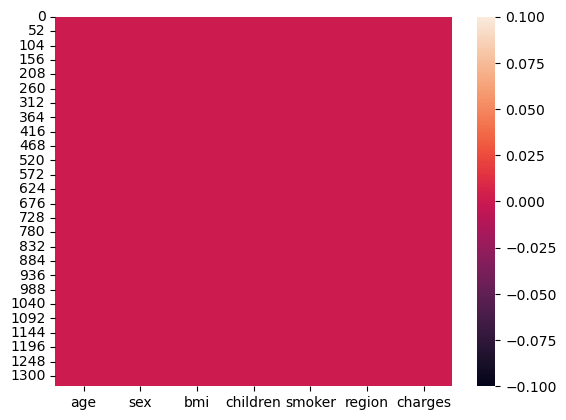

In [10]:
#Let's visualize using heatmap
sns.heatmap(df.isnull())

In [11]:
for i in df.columns:
    print(df[i].value_counts()) #cheching the value count of each column
    print('\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

## From Above Analysis we can take Categorical Column and analyse it

In [12]:
df['sex'].unique() #unique value for sex column

array(['female', 'male'], dtype=object)

In [13]:
df['children'].unique() #unique value for children column

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [14]:
df['children'].nunique() #total unique value for children column

6

In [15]:
df['smoker'].unique() #unique value for smoker column

array(['yes', 'no'], dtype=object)

In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
print("Total no. of duplicated rows:",df.duplicated().sum())

Total no. of duplicated rows: 1


## There is one duplicated row available we have to remove it for further analysis

In [18]:
duplicated_row=df.duplicated()
duplicates=df[duplicated_row]
print(duplicates)                    #Displaying the Duplicated row

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [19]:
df=df.drop_duplicates()  #Removing the duplicate values
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [20]:
df.shape #Dimension of the dataset after removing duplicate rows

(1337, 7)

In [21]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


**There is no negative value present**

**There is no missing values**

**The mean value is greater than the median(50%) in age,bmi and charegescolumns which means the data is skewed to right.**

**By summarizing the data we can observe there is a huge difference between 75% and max hence there 
are outliers presented in the data**

**We will deal all of this if it required**

# Data Visulisation(Grapical Analysis)¶

# Univarite Analysis

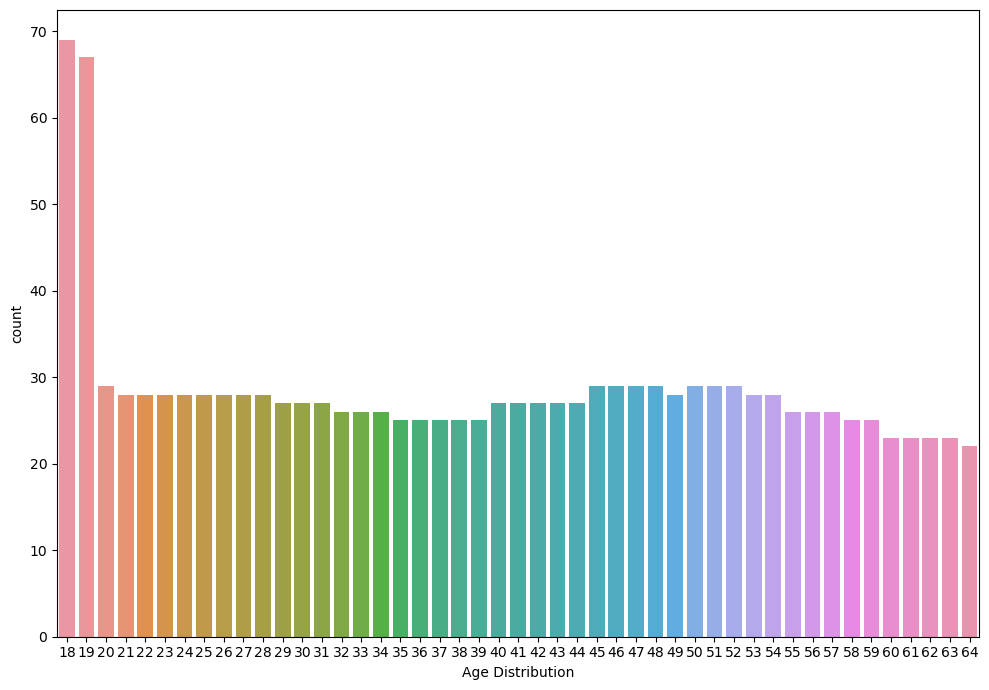

In [22]:
#Age Distribution

plt.figure(figsize=(10,7))
ax=sns.countplot(x='age',data=df)
plt.xlabel("Age Distribution")
plt.tight_layout()

**From above graphical analysis the ages between 18-64**

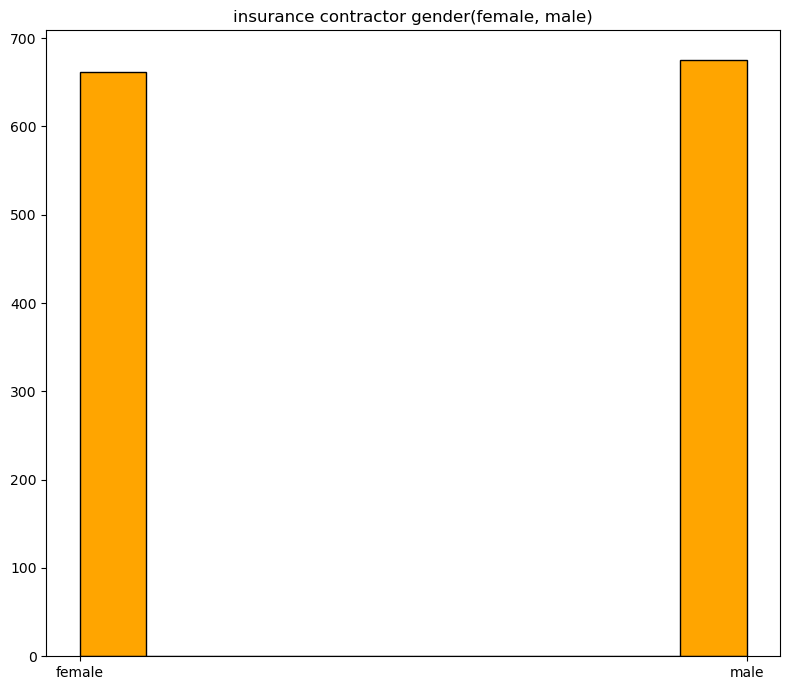

In [23]:
plt.figure(figsize=(8,7))
plt.hist(df['sex'],color='orange',edgecolor='black')
plt.title("insurance contractor gender(female, male)")
plt.tight_layout()
plt.show()

#### From above graphical analysis the sex column contains the gender male and female in equal count

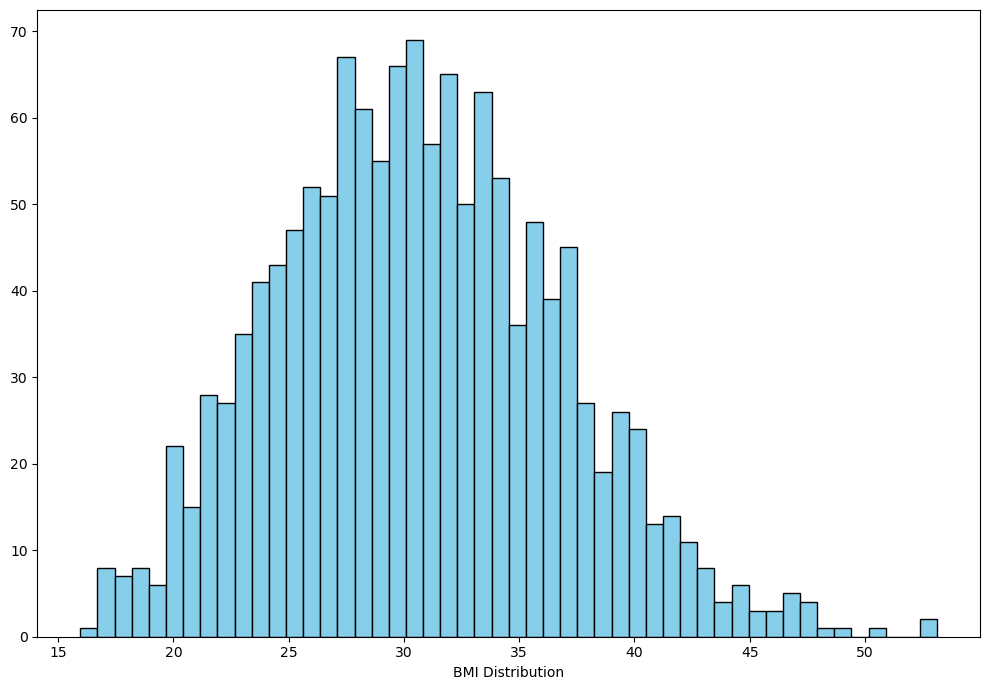

In [24]:
plt.figure(figsize=(10,7))
plt.hist(df['bmi'],bins=50,color='skyblue',edgecolor='black')
plt.xlabel("BMI Distribution")
plt.tight_layout()
plt.show()

#### From above graphical analysis the BMI(Body Mass Index) starts from 16 to 50 plus

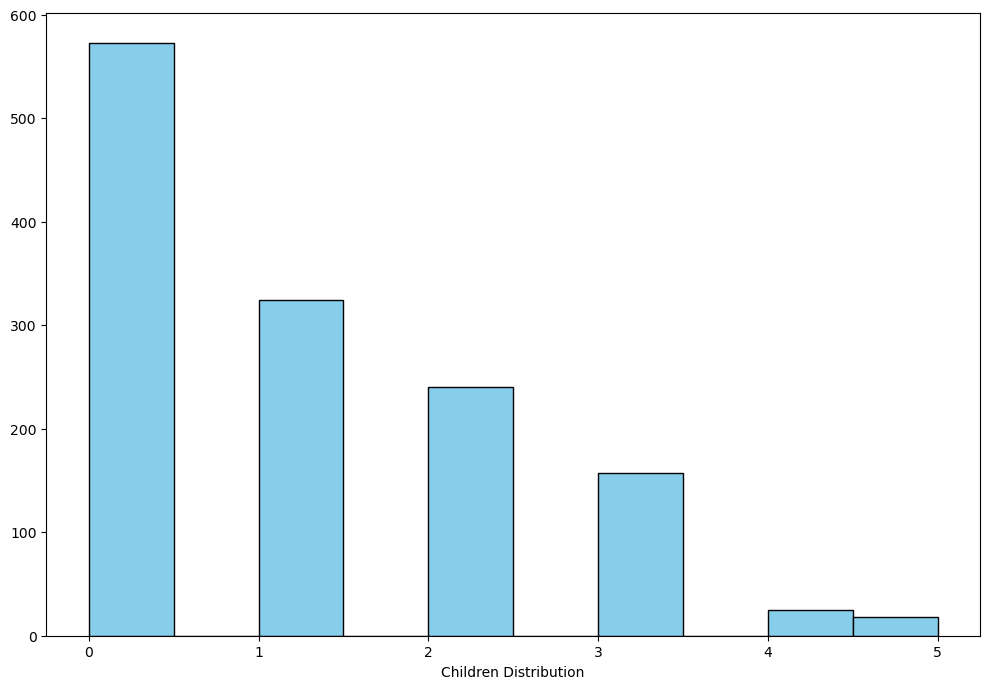

In [25]:
plt.figure(figsize=(10,7))
plt.hist(df['children'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("Children Distribution")
plt.tight_layout()
plt.show()

#### From above graphical analysis the children with value 0 has most count

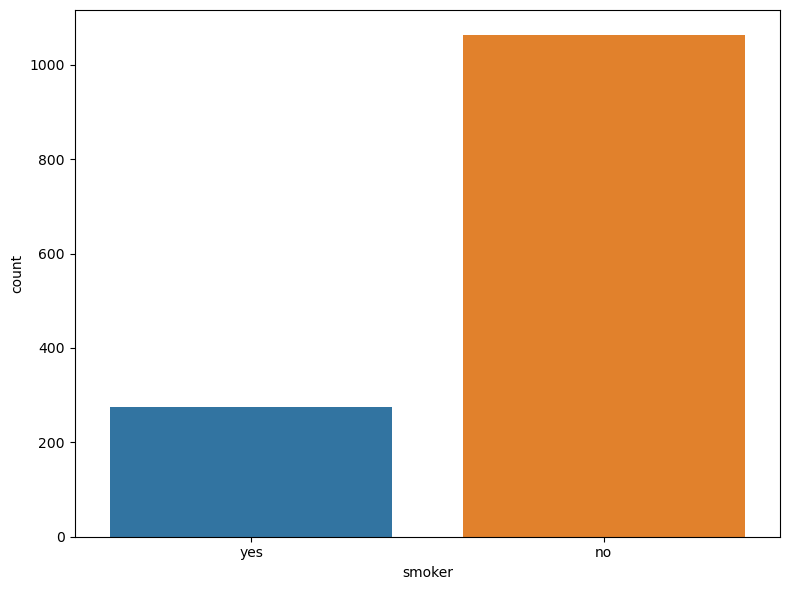

In [26]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='smoker',data=df)
plt.tight_layout()

### From above graphical analysis smokers are less and non-smokers are high

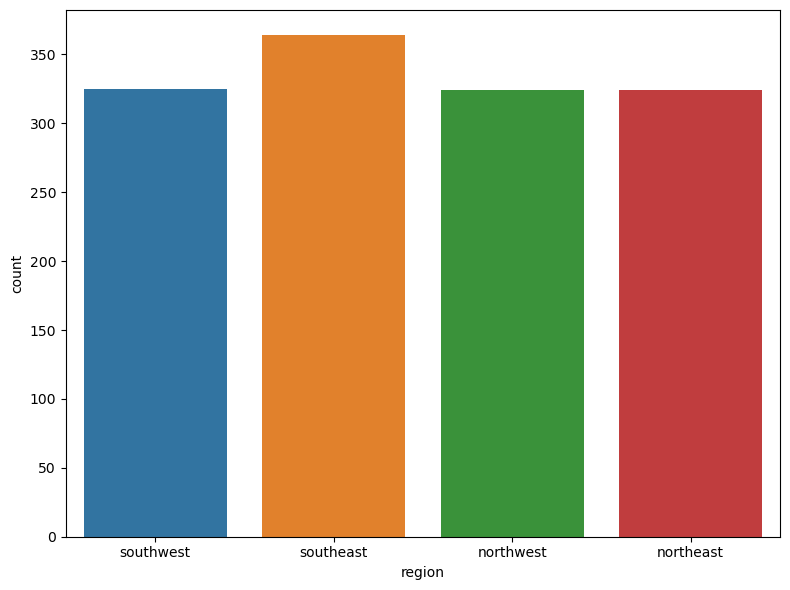

In [27]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='region',data=df)
plt.tight_layout()

### From above graphical analysis southeast region has the highest count

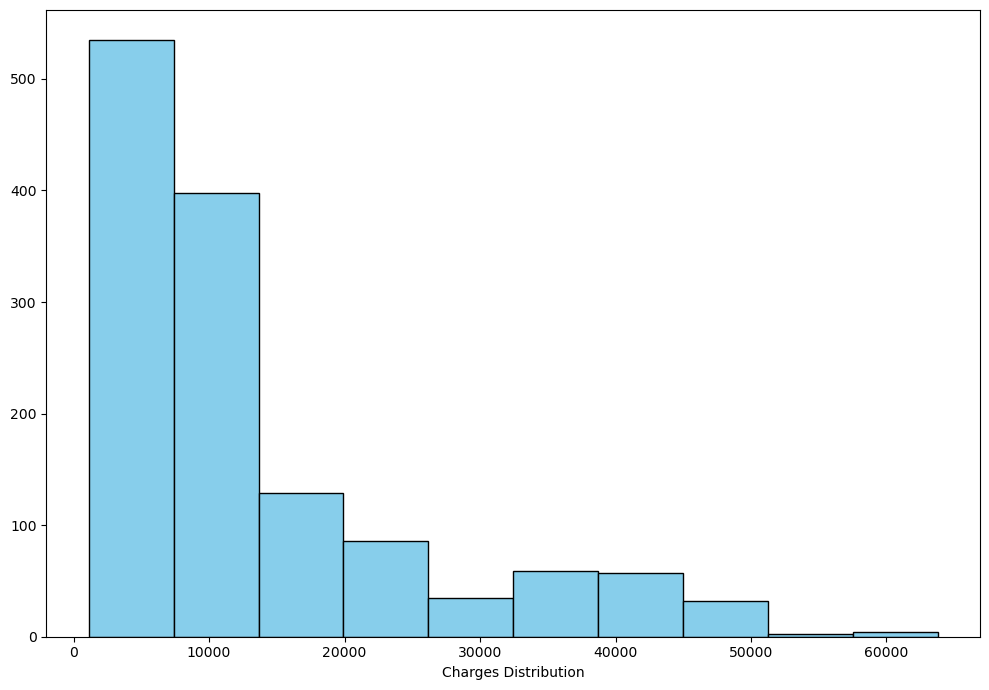

In [28]:
plt.figure(figsize=(10,7))
plt.hist(df['charges'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel("Charges Distribution")
plt.tight_layout()
plt.show()

#### From above graphical analysis charges getting decreased if the amount was high

# Bivariate Analysis(comparing  feature with target variable or label(charges))

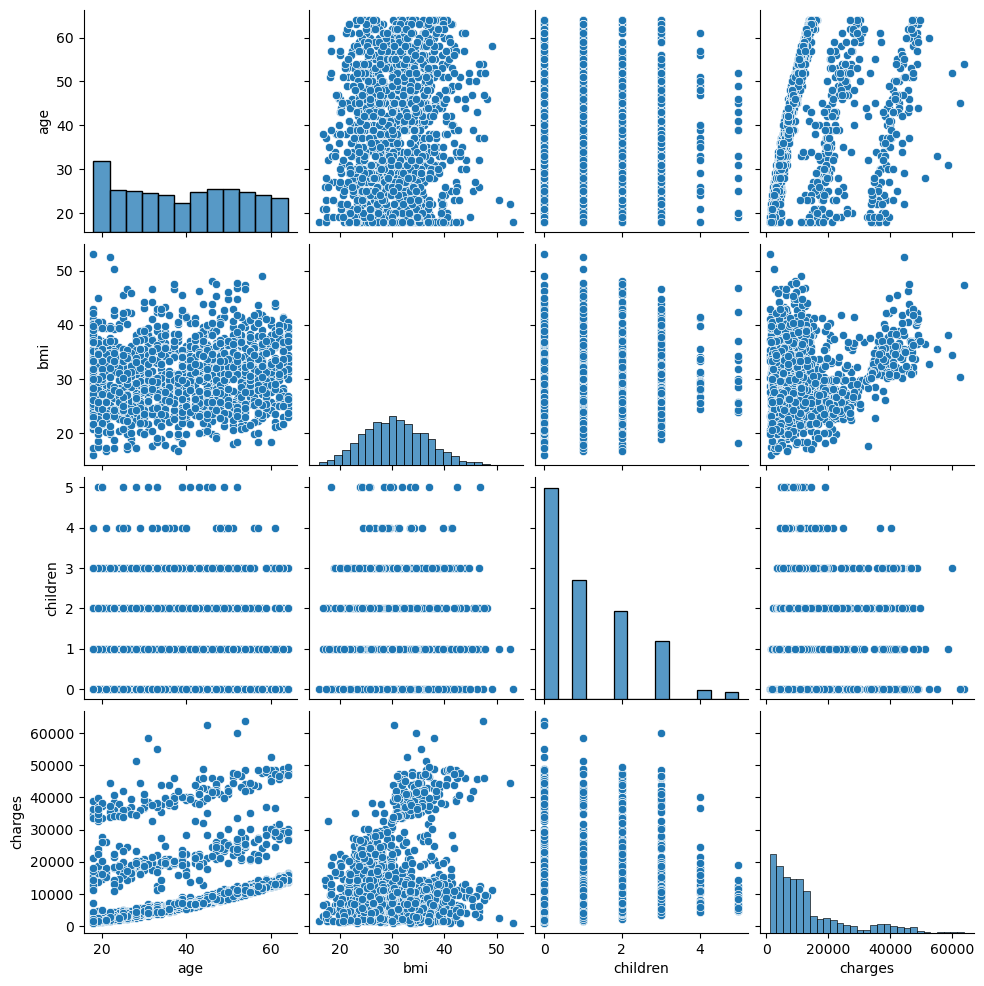

In [29]:
sns.pairplot(data=df,palette=df)

**Age and Charges:These seems to be a trend indicating that as age increases,medical charges also increase**

**Children and BMI:there is no clear correlation visible between the number of children and BMI values**

**Outliers:Some scatter plots may show outliers,such as unusually high medical chareges for certain age groups**

# Converting Categorical features into numerical

In [30]:
df["sex"]=df["sex"].replace({'male':0,'female':1})
df["smoker"]=df["smoker"].replace({'no':0,'yes':1})
df["region"]=df["region"].replace({"southwest":0,"southeast":1,"northwest":2,"northeast":3})

In [31]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


# Checking outliers with box plot 

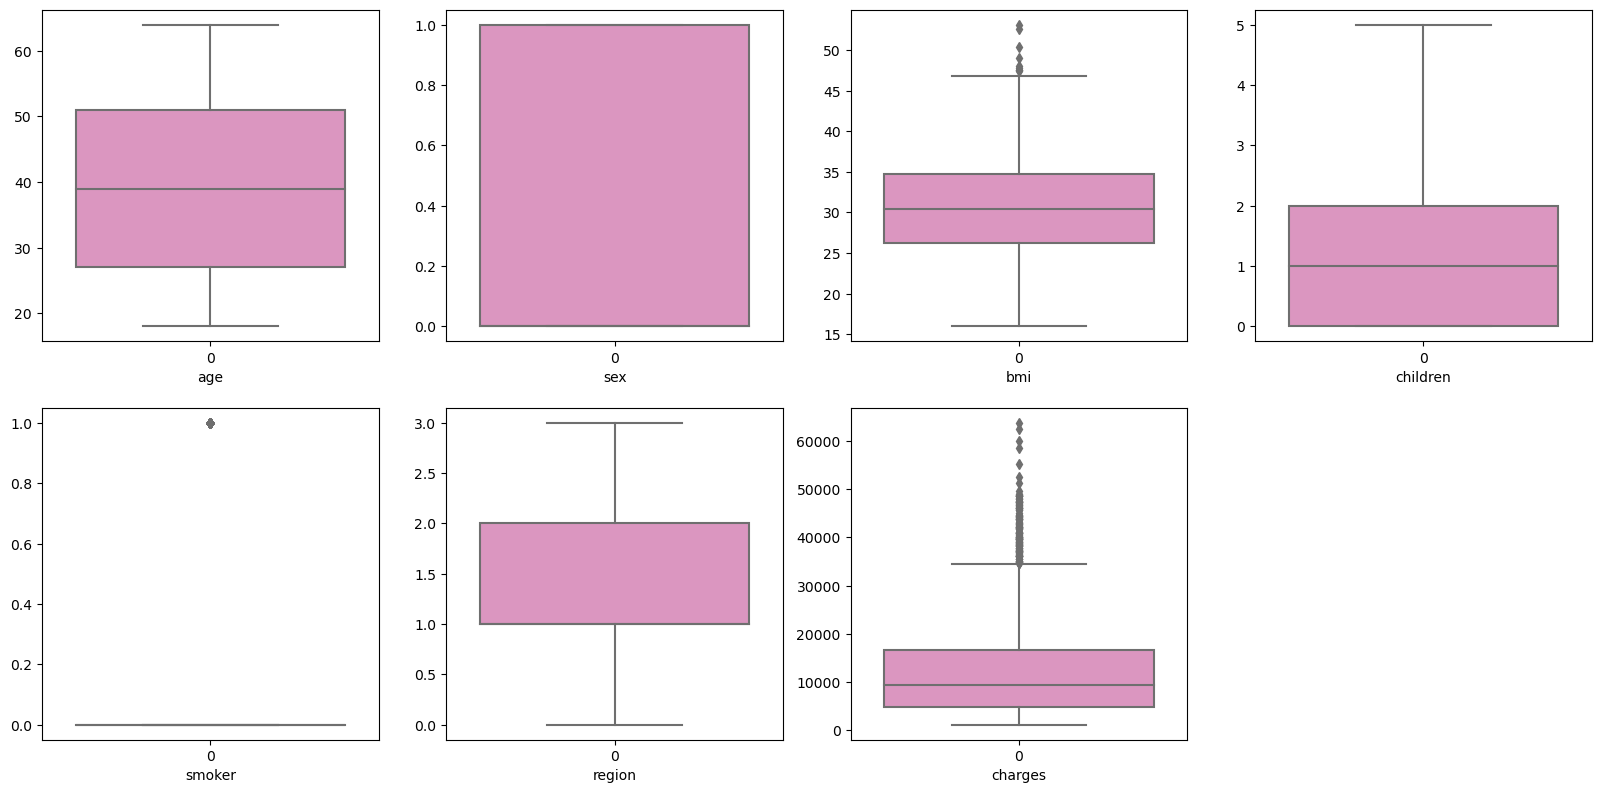

In [32]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
    
plt.show()

**We can clearly see there is outliers presented in bmi and charges columns**

**Ignore the smoker column because it is categorical column**

# Removing outliers in bmi column

In [33]:
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
IQR=q3-q1

In [34]:
lower_outliers=q1-1.5*IQR
upper_outliers=q3 + 1.5*IQR

In [35]:
df=df[(df['bmi']>=lower_outliers)&(df['bmi']<=upper_outliers)]

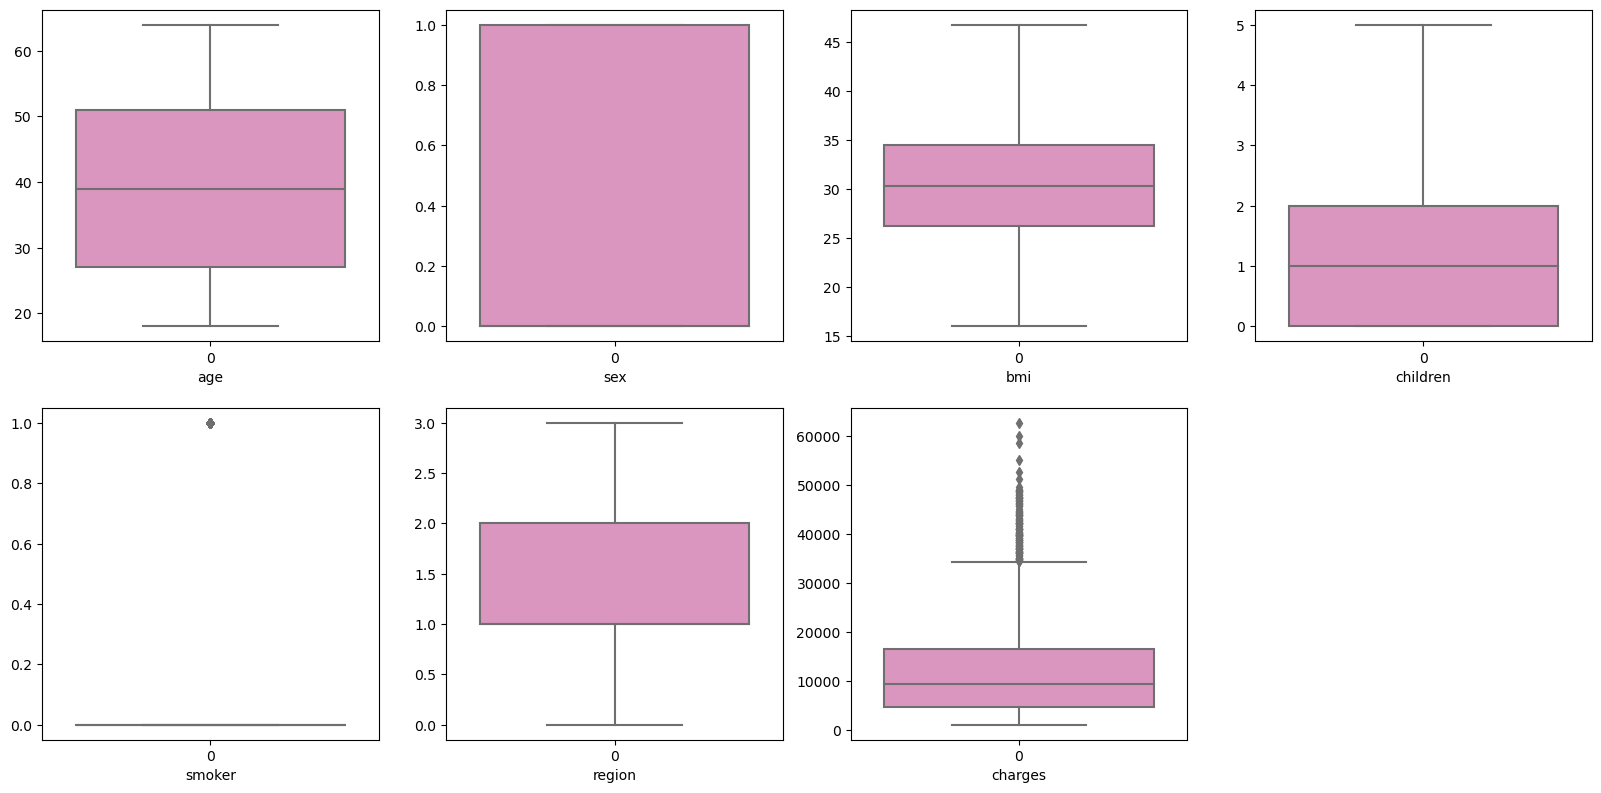

In [36]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=13:
        plt.subplot(5,4,plotnumber)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    plotnumber+=1
    
plt.show()

# Outliers removed in bmi column

In [37]:
df.shape #checking dimension of the dataset after removing outliers

(1328, 7)

# Checking for skewness

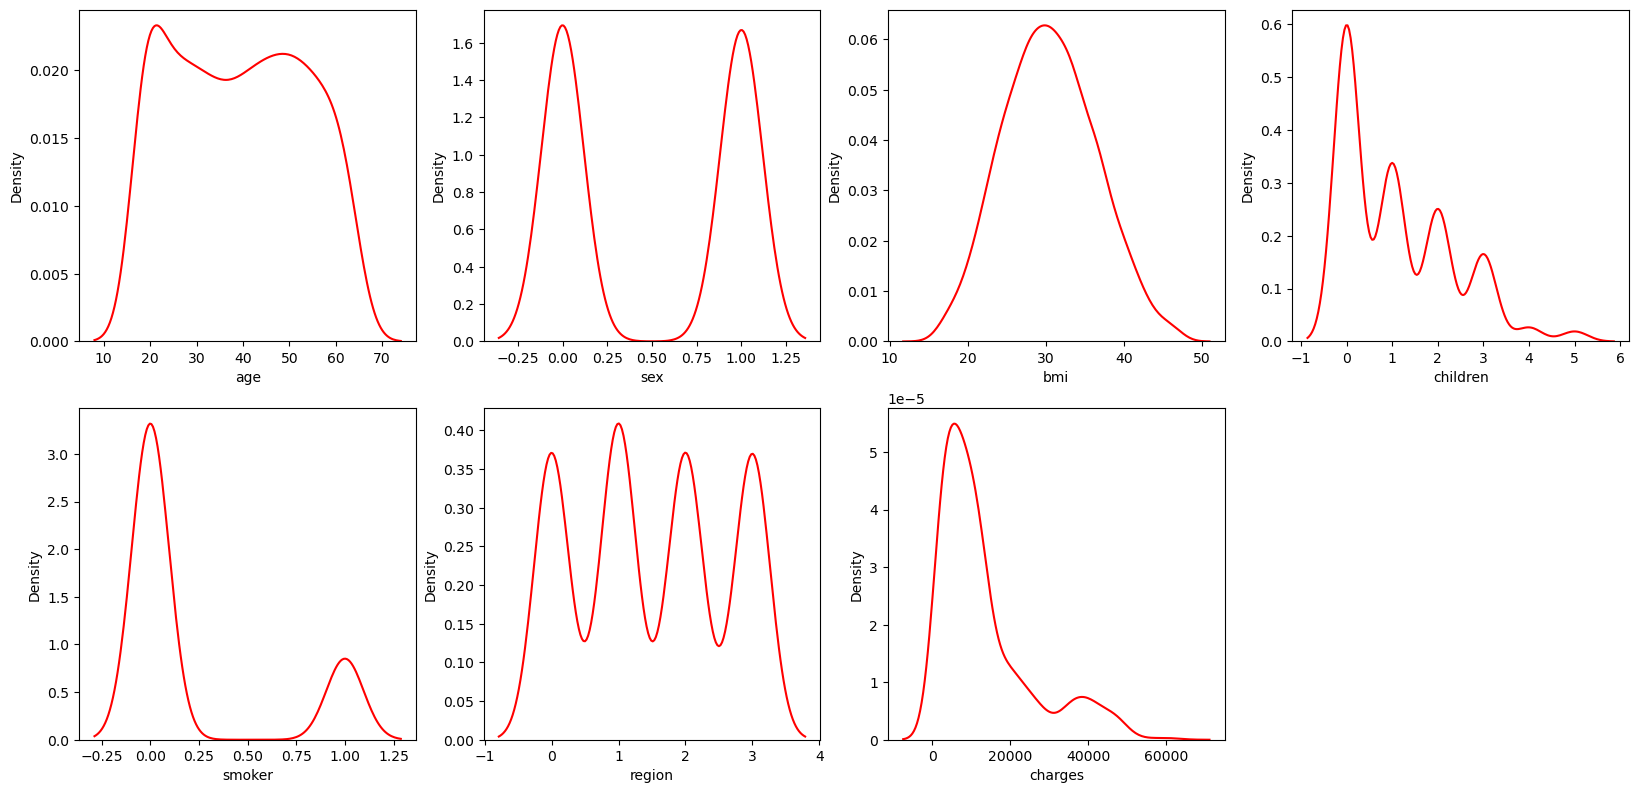

In [38]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=13:
        plt.subplot(5,4,plotnumber)
        sns.distplot(df[i],color='r',hist=False)
        plt.xlabel(i)
    plotnumber+=1
    
plt.show()

**Charges column is right skewed ,reducing skewness in the target variable can be beneficial**

**Ignore the categorical column for the skewness**

**I checked my model performance with and without skewness ,outliers,my model performance was good when the skewness and 
outliers are removed.**

In [39]:
df.skew()

age         0.057521
sex         0.015078
bmi         0.157141
children    0.935660
smoker      1.470251
region      0.032620
charges     1.500088
dtype: float64

# Reducing skewness using log method

In [40]:
df['charges']=np.log1p(df['charges'])

In [41]:
df.skew()  #Skewness removed in charges column

age         0.057521
sex         0.015078
bmi         0.157141
children    0.935660
smoker      1.470251
region      0.032620
charges    -0.091109
dtype: float64

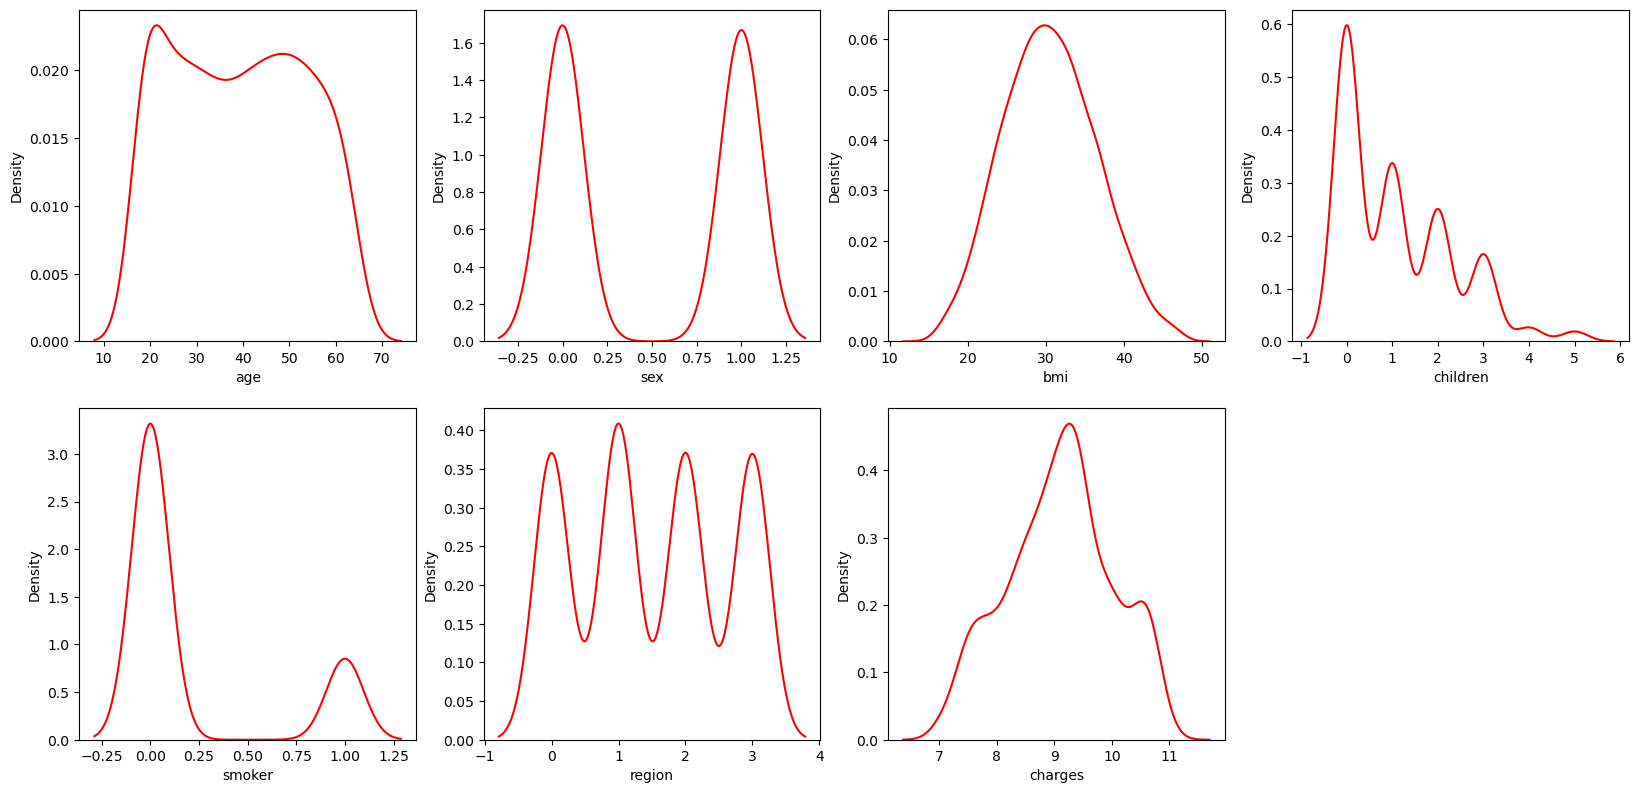

In [42]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=13:
        plt.subplot(5,4,plotnumber)
        sns.distplot(df[i],color='r',hist=False)
        plt.xlabel(i)
    plotnumber+=1
    
plt.show()

**We clearly see charges column have bell shaped curve** 

# Checking Correlation

In [43]:
corr=df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.018089,0.114785,0.042103,-0.025075,-0.002306,0.528385
sex,0.018089,1.000000,-0.039966,-0.019973,-0.080269,0.003311,-0.011359
bmi,0.114785,-0.039966,1.000000,0.017366,-0.002868,-0.155863,0.134105
children,0.042103,-0.019973,0.017366,1.000000,0.007234,-0.017331,0.160717
smoker,-0.025075,-0.080269,-0.002868,0.007234,1.000000,0.005359,0.663834
region,-0.002306,0.003311,-0.155863,-0.017331,0.005359,1.000000,0.045676
charges,0.528385,-0.011359,0.134105,0.160717,0.663834,0.045676,1.000000


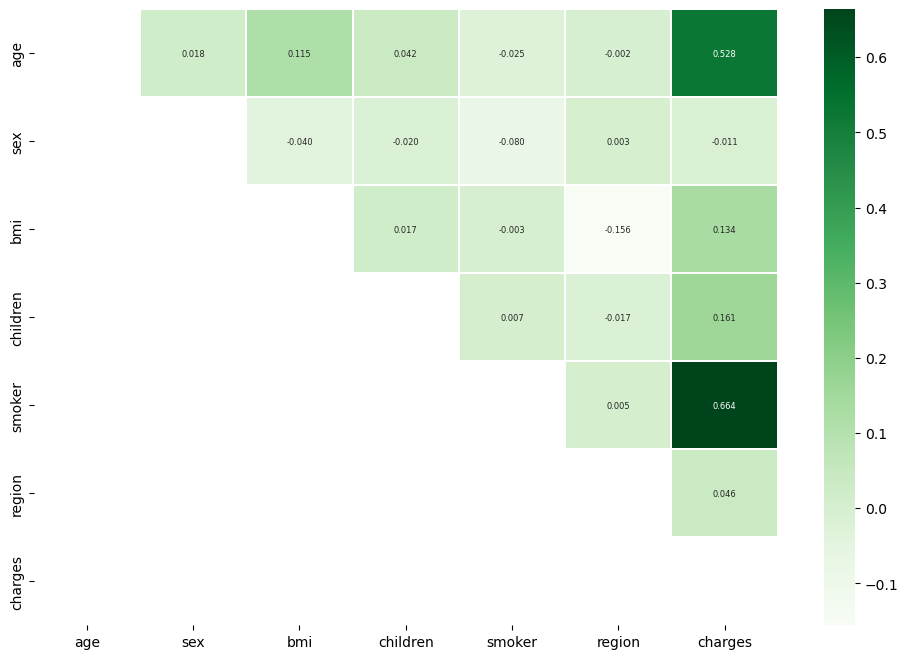

In [44]:
df_corr=df.corr()

lower_triangle=np.tril(df.corr())

plt.figure(figsize=(12,8))

sns.heatmap(df_corr,annot=True,annot_kws={"size":6},cmap='Greens',linewidths=0.1,fmt='.3f',mask=lower_triangle)

plt.show()

**==>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

**1) From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns**

**2)age and charges are positively correlated with a value of 0.528 which is close to 1(high correlation)**

**3)smoker and charges are positively correlated with a value of 0.664 which is close to 1(high correlation)**

# Separting features and labels(to build model)

In [45]:
x=df.drop('charges',axis=1)
y=df['charges']

In [46]:
print("Feature Dimension",x.shape)
print("label Dimension",y.shape)

Feature Dimension (1328, 6)
label Dimension (1328,)


# Feature Scaling using Standard Scalarisation

In [47]:
scalar=StandardScaler()
x=pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440429,1.007559,-0.445495,-0.908563,1.974935,-1.343447
1,-1.511669,-0.992498,0.546068,-0.080442,-0.506346,-0.439649
2,-0.799261,-0.992498,0.415999,1.575799,-0.506346,-0.439649
3,-0.443056,-0.992498,-1.323037,-0.908563,-0.506346,0.464149
4,-0.514297,-0.992498,-0.279953,-0.908563,-0.506346,0.464149
...,...,...,...,...,...,...
1323,0.768039,-0.992498,0.073091,1.575799,-0.506346,0.464149
1324,-1.511669,1.007559,0.233565,-0.908563,-0.506346,1.367947
1325,-1.511669,1.007559,1.066343,-0.908563,-0.506346,-0.439649
1326,-1.297947,1.007559,-0.800228,-0.908563,-0.506346,-1.343447


# Checking Variance inflation factor (VIF)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

vif

,VIF values,features
0,1.016415,age
1,1.008965,sex
2,1.040798,bmi
3,1.002634,children
4,1.007135,smoker
5,1.025443,region


**If VIF value is greater than 10,consider it as a sign of multicollinearity but our features does not have the value greater than 10**

# Finding the best random state

In [50]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

Best Accuracy is  0.9308825594638177 at random state 117


# Creating train test split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=maxRS)

# Creating a Function with R2_score,Mean_Absolute_Error,Mean_Squared_Error ,Mean_Squared_Error and Random_mean_squared_error difference between R2 score and cross validation

In [52]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"R2_Score:{r2_score(y_train,y_pred)*100:.2f}%")  #r2_score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f"R2_Score:{r2_score(y_test,pred)*100:.2f}%")  #r2_score for test result
        
        print("\n Mean_Absolute_Error:",mean_absolute_error(y_test,pred))
        
        print("\n Mean_Squared_Error:",mean_squared_error(y_test,pred))
        
        print("\n Random_mean_squared_error:",np.sqrt(mean_squared_error(y_test,pred)))
              
        
        score=cross_val_score(clf,x,y)
        print('\n',score)
        print('\n',score.mean())
        print("\n Difference between R2_score and cross validation is:",r2_score(y_test,pred)-score.mean()) #Difference between r2_score and cross validation(to find which model is best)

# LinearRegression

In [53]:
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [54]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:76.21%

================Test Result=============
R2_Score:93.09%

 Mean_Absolute_Error: 0.16255908050297166

 Mean_Squared_Error: 0.053184092573275624

 Random_mean_squared_error: 0.23061676559451533

 [0.79822281 0.68885851 0.82915819 0.76266357 0.73229852]

 0.7622403182262805

 Difference between R2_score and cross validation is: 0.16864224123753724


# RandomForestRegressor

In [55]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:96.93%

================Test Result=============
R2_Score:97.06%

 Mean_Absolute_Error: 0.07511559308509422

 Mean_Squared_Error: 0.022613217171839457

 Random_mean_squared_error: 0.15037691701800332

 [0.85161466 0.70673576 0.86141753 0.82675915 0.78697514]

 0.8067004473262255

 Difference between R2_score and cross validation is: 0.1639116733740953


# KNeighborsRegressor

In [57]:
clf=knn()
clf.fit(x_train,y_train)

KNeighborsRegressor()

In [58]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:86.09%

================Test Result=============
R2_Score:93.20%

 Mean_Absolute_Error: 0.15915622253659928

 Mean_Squared_Error: 0.05235892845707246

 Random_mean_squared_error: 0.2288207343250879

 [0.84904833 0.68918429 0.8434113  0.80680034 0.78314248]

 0.7943173484176189

 Difference between R2_score and cross validation is: 0.13763758492670986


# GradientBoostingRegressor

In [59]:
clf=GradientBoostingRegressor()
clf.fit(x_train,y_train)

GradientBoostingRegressor()

In [60]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:87.43%

================Test Result=============
R2_Score:94.74%

 Mean_Absolute_Error: 0.13131760160852657

 Mean_Squared_Error: 0.04049723376633197

 Random_mean_squared_error: 0.20123924509481736

 [0.87541455 0.72947078 0.89992739 0.83715139 0.80117453]

 0.8286277264065436

 Difference between R2_score and cross validation is: 0.11874253016278968


# Ridge

In [61]:
clf=Ridge()
clf.fit(x_train,y_train)

Ridge()

In [62]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:76.21%

================Test Result=============
R2_Score:93.07%

 Mean_Absolute_Error: 0.16263491107306008

 Mean_Squared_Error: 0.05330648080090473

 Random_mean_squared_error: 0.23088196291807797

 [0.79817342 0.68897999 0.82901406 0.76269969 0.7323476 ]

 0.7622429545838021

 Difference between R2_score and cross validation is: 0.16848055053432331


# DecisionTreeRegressor

In [63]:
clf= DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [64]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:99.55%

================Test Result=============
R2_Score:95.74%

 Mean_Absolute_Error: 0.07038347162641218

 Mean_Squared_Error: 0.032746421393431834

 Random_mean_squared_error: 0.18095972312487615

 [0.71412322 0.60796238 0.65856211 0.71255693 0.69188491]

 0.6770179130087772

 Difference between R2_score and cross validation is: 0.2804252109795674


# SVR

In [65]:
clf=SVR()
clf.fit(x_train,y_train)

SVR()

In [66]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:83.84%

================Test Result=============
R2_Score:96.11%

 Mean_Absolute_Error: 0.11663108874593056

 Mean_Squared_Error: 0.029949126803410043

 Random_mean_squared_error: 0.1730581601757341

 [0.89426825 0.71760224 0.90931106 0.8323856  0.80175303]

 0.8310640356588813

 Difference between R2_score and cross validation is: 0.13001442049615652


# ExtraTreesRegressor

In [67]:
clf=ExtraTreesRegressor()
clf.fit(x_train,y_train)

ExtraTreesRegressor()

In [68]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:99.55%

================Test Result=============
R2_Score:97.01%

 Mean_Absolute_Error: 0.07061006240165625

 Mean_Squared_Error: 0.02299192760112122

 Random_mean_squared_error: 0.15163089263445367

 [0.81369141 0.67162904 0.8468444  0.79587403 0.77250038]

 0.7801078520457011

 Difference between R2_score and cross validation is: 0.1900121008971225


## Checking Difference between accuracy score and cross validation,the model GradientBoostingRegressor has lowest value so GradientBoostingRegressor is our best model.

# Hyperparameter Tuning

In [69]:
param={'n_estimators':[50,100,200],
      'learning_rate':[0.01,0.05,0.1],
      'max_depth':[3,4,5],
      'min_samples_split':[2,5,10],
      'min_samples_leaf':[2,4,6],
      'subsample':[0.6,0.7,0.8]}

In [70]:
gscv=GridSearchCV(GradientBoostingRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.7, 0.8]})

In [72]:
gscv.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

# Final Model

In [76]:
MCPI_model=GradientBoostingRegressor(learning_rate=0.05,
                                    max_depth=3,
                                    min_samples_leaf=4,
                                    min_samples_split=2,
                                    n_estimators=100,
                                    subsample=0.8)

In [77]:
MCPI_model.fit(x_train,y_train)
pred=MCPI_model.predict(x_test)
r2_score=r2_score(y_test,pred)
print(r2_score*100)

95.86751911668853


# Saving The Model

In [81]:
joblib.dump(MCPI_model,'Medical Cost Personal Insurance Project.pkl')

['Medical Cost Personal Insurance Project.pkl']

# Predicting the saved model

In [82]:
model=joblib.load('Medical Cost Personal Insurance Project.pkl')

In [83]:
prediction=model.predict(x_test)
prediction

array([ 7.60928346,  7.56581136,  9.63070748,  8.55617529,  9.15166622,
        9.56940903,  9.82373582,  9.52299526,  9.08355618, 10.43675042,
        9.91634272, 10.69314191,  8.88986614,  9.3788964 ,  9.84051829,
        8.96659797,  8.16920613, 10.60688423,  8.44803339,  9.50083903,
        8.60031251,  9.56991939,  9.38450733,  9.7413892 ,  8.94331139,
        9.51436727,  7.69920631,  9.52888327,  9.52843496,  8.74311228])

In [84]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["original"]=a
df

,Predicted,original
0,7.609283,7.441654
1,7.565811,7.455174
2,9.630707,10.361577
3,8.556175,8.389526
4,9.151666,8.979201
5,9.569409,9.490231
6,9.823736,9.862715
7,9.522995,9.538795
8,9.083556,8.990811
9,10.436750,10.480005
